In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("merged_data.csv")

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.columns

In [ ]:
data.head(4)

#### calculating Altman's score:
Z-Score =  1.2(A) + 1.4(B) + 3.3(C) + 0.6(D) + 1.0(E)

Here is the link:https://www.investopedia.com/terms/a/altman.asp

In [ ]:
first=1.2*((data['Total Current Assets']-data['Total Current Liabilities'])/data['Total Assets'])

In [3]:
second=1.4*((data['Retained Earnings'])/data['Total Assets'])

NameError: name 'data' is not defined

In [4]:
third=3.3*((data['Earnings Before Interest and Tax']/data['Total Assets']))

NameError: name 'data' is not defined

In [5]:
fourth=0.6*((data['Estimated Shares Outstanding']*data['close'])/data['Total Liabilities'])

NameError: name 'data' is not defined

In [174]:
fifth = 1*((data['Total Revenue'])/data['Total Assets'])

In [175]:
z_score=first+second+third+fourth+fifth

In [176]:
data['z_score']=z_score

In [177]:
data.drop(['trend'],axis=1,inplace=True)

In [178]:
data.head(10)

,symbol,date,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,open,close,low,high,volume,Security,GICS Sector,GICS Sub Industry,PE,z_score
0,AAL,2012-12-31,3.068000e+09,-2.220000e+08,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,12.850000,13.500000,12.840000,13.680000,7005600.0,22,5,4,-2.410714,0.249317
1,AAL,2013-12-31,4.975000e+09,-9.300000e+07,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,24.740000,25.250000,24.629999,25.250000,7166600.0,22,5,4,-2.244444,0.224697
2,AAL,2014-12-31,4.668000e+09,-1.600000e+08,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,53.900002,53.630001,53.320000,54.639999,10626000.0,22,5,4,13.340796,1.536275
3,AAL,2015-12-31,5.102000e+09,3.520000e+08,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,42.540001,42.349998,41.830002,42.570000,6788900.0,22,5,4,3.718174,1.492806
4,ABBV,2013-12-31,6.448000e+09,6.810000e+08,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,52.990002,52.810001,52.360001,53.060001,3019700.0,4,4,87,20.468993,3.855570
5,ABBV,2014-12-31,6.954000e+09,-1.720000e+08,-6.510000e+08,102.0,-6.120000e+08,4.194000e+09,74.0,8.348000e+09,...,66.720001,65.440002,65.349998,67.099998,3917300.0,4,4,87,58.954957,3.723185
6,ABBV,2015-12-31,8.463000e+09,-1.076000e+09,-2.060000e+08,130.0,-5.320000e+08,1.308000e+10,77.0,8.399000e+09,...,59.500000,59.240002,59.200001,59.930000,6019300.0,4,4,87,18.806350,2.250887
7,ABC,2013-09-30,1.487064e+10,-2.312518e+09,-4.400000e+04,19.0,-2.024500e+08,2.360992e+09,8.0,1.231006e+09,...,60.900002,61.099998,60.689999,61.270000,1040200.0,29,4,44,32.499999,5.396919
8,ABC,2014-09-30,1.725016e+10,-9.382860e+08,-2.859400e+07,14.0,-2.644570e+08,2.749185e+09,10.0,1.808513e+09,...,77.650002,77.300003,77.190002,78.019997,1373500.0,29,4,44,63.360658,6.278125
9,ABC,2015-09-30,2.157823e+10,-1.478793e+09,-4.422000e+07,22.0,-2.315850e+08,3.736477e+09,10.0,2.167442e+09,...,96.080002,94.989998,94.070000,96.680000,2381200.0,29,4,44,-153.209674,5.376186


In [100]:
### should we just look at 2015?

In [101]:
'''
data.loc[data['z_score'] < 1.81, 'z_score'] = 0
data.loc[(data['z_score'] >= 1.81) & (data['z_score'] < 3), 'z_score'] = 1
data.loc[ data['z_score'] > 3, 'z_score'] = 2
'''

In [114]:
'''
data['z_score']=data['z_score'].astype('int64')
'''

In [179]:
data.head()

,symbol,date,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,open,close,low,high,volume,Security,GICS Sector,GICS Sub Industry,PE,z_score
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,12.850000,13.500000,12.840000,13.680000,7005600.0,22,5,4,-2.410714,0.249317
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,24.740000,25.250000,24.629999,25.250000,7166600.0,22,5,4,-2.244444,0.224697
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,53.900002,53.630001,53.320000,54.639999,10626000.0,22,5,4,13.340796,1.536275
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,42.540001,42.349998,41.830002,42.570000,6788900.0,22,5,4,3.718174,1.492806
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,52.990002,52.810001,52.360001,53.060001,3019700.0,4,4,87,20.468993,3.855570


In [180]:
data_1=data.filter(['symbol', 'date',"Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
'Cost of Revenue','Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Earnings Before Interest and Tax','Earnings Before Tax', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Net Borrowings', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt', 'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Earnings Per Share', 'Estimated Shares Outstanding', 'close', 'GICS Sector',
       'GICS Sub Industry', 'z_score'])

In [181]:
data_1.head()

,symbol,date,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Cost of Revenue,Current Ratio,...,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Earnings Per Share,Estimated Shares Outstanding,close,GICS Sector,GICS Sub Industry,z_score
0,AAL,2012-12-31,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,1.049900e+10,78.0,...,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-5.60,3.350000e+08,13.500000,5,4,0.249317
1,AAL,2013-12-31,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,1.101900e+10,104.0,...,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,-11.25,1.630222e+08,25.250000,5,4,0.224697
2,AAL,2014-12-31,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,1.562000e+10,88.0,...,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,4.02,7.169154e+08,53.630001,5,4,1.536275
3,AAL,2015-12-31,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,1.109600e+10,73.0,...,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,11.39,6.681299e+08,42.349998,5,4,1.492806
4,ABBV,2013-12-31,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,4.581000e+09,259.0,...,4.492000e+09,2.470600e+10,2.919800e+10,1.879000e+10,2.58,1.600000e+09,52.810001,4,87,3.855570


In [83]:
#data.drop(['symbol','date'],axis=1,inplace=True)

In [182]:
data_1.shape

(1357, 61)

### Models

In [183]:
x=data_1.iloc[:,2:60]
y=data_1.z_score

In [184]:
x.head()

,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Earnings Per Share,Estimated Shares Outstanding,close,GICS Sector,GICS Sub Industry
0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,1.049900e+10,78.0,0.000000e+00,223000000.0,...,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-5.60,3.350000e+08,13.500000,5,4
1,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,1.101900e+10,104.0,0.000000e+00,935000000.0,...,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,-11.25,1.630222e+08,25.250000,5,4
2,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,1.562000e+10,88.0,0.000000e+00,829000000.0,...,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,4.02,7.169154e+08,53.630001,5,4
3,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,1.109600e+10,73.0,2.477000e+09,667000000.0,...,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,11.39,6.681299e+08,42.349998,5,4
4,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,4.581000e+09,259.0,0.000000e+00,0.0,...,6.879000e+09,4.492000e+09,2.470600e+10,2.919800e+10,1.879000e+10,2.58,1.600000e+09,52.810001,4,87


In [185]:
SEED=1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Decision Tree Regressor

In [186]:
# Import DecisionTreeRegressor from sklearn.tree
SEED=1
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20)
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=5,min_samples_leaf=20,
                           random_state=3)

# Fit dt to the training set
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [187]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 


RMSE_CV = (MSE_CV_scores.mean())**(1/2)

print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test set RMSE of dt: 2.28
CV RMSE: 2.94
Train RMSE: 2.50


### Linear Regression

In [188]:
lr = LinearRegression()
lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error as MSE

y_pred = lr.predict(x_test)


mse_lr = MSE(y_test, y_pred)


rmse_lr = mse_lr**(1/2)


print("Test set RMSE of lr: {:.2f}".format(rmse_lr))

from sklearn.model_selection import cross_val_score
MSE_CV_scores = - cross_val_score(lr, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
y_pred_train = lr.predict(x_train)
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
print('Train RMSE: {:.2f}'.format(RMSE_train))

Test set RMSE of lr: 2.22
CV RMSE: 3.20
Train RMSE: 2.71


### Random Forest

In [189]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = \
train_test_split(x, y,
test_size=0.2,
random_state=SEED)


rf = RandomForestRegressor(n_estimators=500,
min_samples_leaf=30,
random_state=SEED)
# Fit 'rf' to the training set
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_pred_train=rf.predict(x_train)

rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 


RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE

print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 3.34
CV RMSE: 2.50
Train set RMSE of rf: 2.29


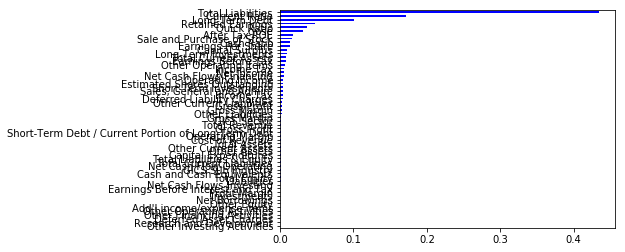

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = x.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()